In [74]:
from Bio import Entrez
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string 
import nltk
from nltk import bigrams
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from scipy.cluster.hierarchy import dendrogram, linkage

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/obrovkina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
from nltk.corpus import stopwords

# Articles mining for Flavoni

In [3]:
Entrez.email = "brov.olia@gmail.com"

In [4]:
search_term = '"Flavonifractor"[Title/Abstract]'

In [70]:
# Fetch PubMed records
handle = Entrez.esearch(db="pubmed", term=search_term, retmax=500)
record = Entrez.read(handle)
handle.close()


In [71]:
# Get list of PubMed IDs
pmids = record["IdList"]

In [72]:
len(pmids)

224

In [73]:
# Initialize list to store article details
articles = []

In [74]:
# Retrieve article details for each PubMed ID
for pubmed_id in pmids:
    handle = Entrez.efetch(db="pubmed", id=pubmed_id, rettype="medline", retmode="text")
    article_details = handle.read()
    handle.close()
    
    # Append article details to list
    articles.append(article_details)

In [64]:
articles

['\nPMID- 38634357\nOWN - NLM\nSTAT- Publisher\nLR  - 20240418\nIS  - 1535-3907 (Electronic)\nIS  - 1535-3893 (Linking)\nDP  - 2024 Apr 18\nTI  - Multiomics Analysis Revealed Colorectal Cancer Pathogenesis.\nLID - 10.1021/acs.jproteome.3c00894 [doi]\nAB  - Gut microbiota-derived microbial compounds may link to the pathogenesis of \n      colorectal cancer (CRC). However, the role of the host-microbiome in the \n      incidence and progression of CRC remains elusive. We performed 16S rRNA \n      sequencing, metabolomics, and proteomic studies on samples from 85 CRC patients \n      who underwent colonoscopy examination and found two distinct changed patterns of \n      microbiome in CRC patients. The relative abundances of Catabacter and \n      Mogibacterium continuously increased from intramucosal carcinoma to advanced \n      stages, whereas Clostridium, Anaerostipes, Vibrio, Flavonifractor, Holdemanella, \n      and Hungatella were significantly altered only in intermediate lesions

In [75]:
# Create empty lists to store data
pmids = []
titles = []
abstracts = []
authors = []
journal = []
pub_dates = []

# Iterate through each article
for article in articles:
    # Extract PMID
    pmid_match = re.search(r'PMID- (\d+)', article)
    if pmid_match:
        pmids.append(pmid_match.group(1))
    else:
        pmids.append(None)
    
    # Extract title
    title_match = re.search(r'TI  - (.+)', article)
    if title_match:
        titles.append(title_match.group(1))
    else:
        titles.append(None)
    
    # Extract abstract
    abstract_match = re.search(r'AB  - (.+)', article)
    if abstract_match:
        abstracts.append(abstract_match.group(1))
    else:
        abstracts.append(None)
    
    # Extract authors
    author_match = re.search(r'FAU - (.+)', article)
    if author_match:
        authors.append(author_match.group(1))
    else:
        authors.append(None)
    
    # Extract journal
    journal_match = re.search(r'JT  - (.+)', article)
    if journal_match:
        journal.append(journal_match.group(1))
    else:
        journal.append(None)
    
    # Extract publication date
    pub_date_match = re.search(r'DP  - (\d{4} [A-Z][a-z]+ \d{1,2})', article)
    if pub_date_match:
        pub_dates.append(pub_date_match.group(1))
    else:
        pub_dates.append(None)

# Create DataFrame
df = pd.DataFrame({
    'PMID': pmids,
    'Title': titles,
    'Abstract': abstracts,
    'Authors': authors,
    'Journal': journal,
    'Publication Date': pub_dates
})

In [136]:
df

,PMID,Title,Abstract,Authors,Journal,Publication Date,Publication Year,Preprocessed_Title,Cluster
0,38634357,multiomics analysis revealed colorectal cancer...,Gut microbiota-derived microbial compounds may...,"Xu, Yong-Jiang",Journal of proteome research,2024-04-18,2024.0,multiomics analysis revealed colorectal cancer...,0
1,38575885,investigating the causal role of the gut micro...,BACKGROUND: Through research on the gut microb...,"Li, Jia",BMC cancer,2024-04-04,2024.0,investigating causal role gut microbiota esoph...,2
2,38563684,promising probiotic-fermented soymilk for alle...,Fermented soymilk (FSM4) has attracted much at...,"Madjirebaye, Philippe",Food & function,2024-04-02,2024.0,promising soymilk alleviating acute diarrhea i...,0
3,38555382,enzymatic conversion of human blood group a ki...,ABO blood group compatibility restrictions pre...,"MacMillan, Serena",Nature communications,2024-03-30,2024.0,enzymatic conversion human blood group kidneys...,1
4,38529273,potential for the development of taraxacum mon...,INTRODUCTION: Taraxacum mongolicum (TM) is a k...,"Dong, Zhen",Frontiers in immunology,NaT,NaN,potential development taraxacum mongolicum aqu...,0
...,...,...,...,...,...,...,...,...,...
219,25427406,successional changes in the chicken cecal micr...,BACKGROUND: Poultry remains a major source of ...,"Oakley, Brian B",BMC veterinary research,2014-11-27,2014.0,successional changes chicken cecal microbiome ...,2
220,24947740,isolation and characterization of rat intestin...,Two intestinal bacterial strains MT4s-5 and MT...,"Takagaki, Akiko",Archives of microbiology,NaT,NaN,isolation characterization rat intestinal bact...,0
221,23918795,"intestinimonas butyriciproducens gen. nov., sp...","A Gram-positive, spore-forming, non-motile, st...","Klaring, Karoline",International journal of systematic and evolut...,NaT,NaN,intestinimonas butyriciproducens sp,0
222,21457417,isolation of catechin-converting human intesti...,AIMS: To isolate and characterize bacteria fro...,"Kutschera, M",Journal of applied microbiology,NaT,NaN,isolation human intestinal bacteria,0


In [135]:
df['Title'] = df['Title'].str.lower()

In [77]:
df.to_csv('./results/literature.csv')

# Simple analysis

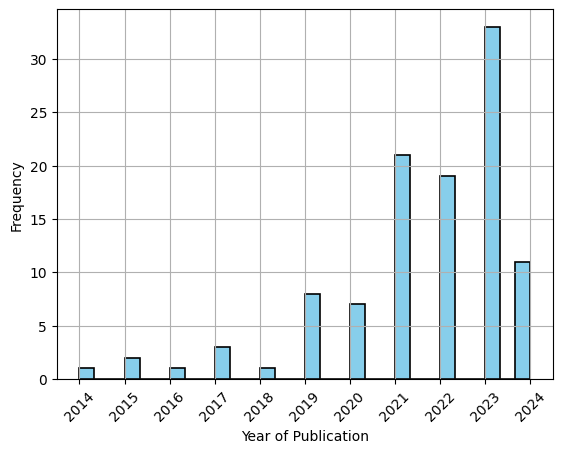

In [85]:
# Convert "Publication Date" column to datetime format
df['Publication Date'] = pd.to_datetime(df['Publication Date'])

# Extract the year from the "Publication Date" column
df['Publication Year'] = df['Publication Date'].dt.year

# Plot histogram
df['Publication Year'].hist(bins=30, color='skyblue', edgecolor='black', linewidth=1.2)

# Add labels and title
plt.xlabel('Year of Publication')
plt.ylabel('Frequency')

# Set x-axis ticks to be more frequent
plt.xticks(range(int(df['Publication Year'].min()), int(df['Publication Year'].max()) + 1), rotation=45)
plt.savefig('./results/hist_year.png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

/var/folders/jb/_8_vphsd23b492s44llp9vx00000gp/T/ipykernel_15403/915376681.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


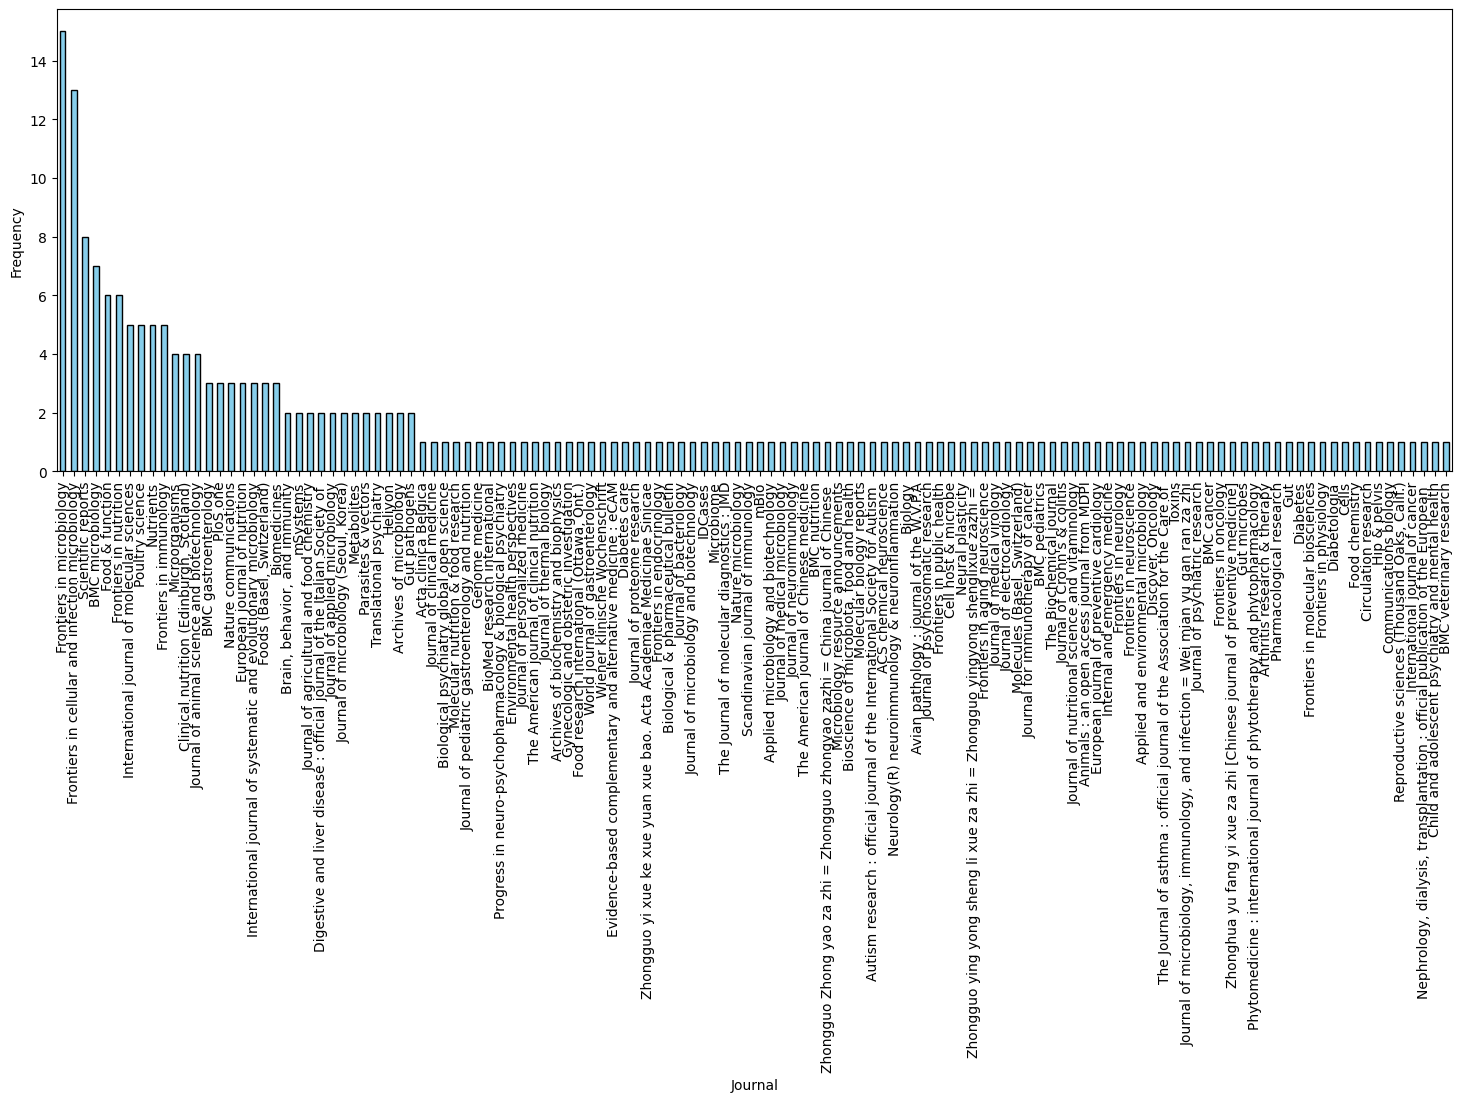

In [89]:
# Plot histogram of journals
plt.figure(figsize=(18, 6))
df['Journal'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Journal')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.savefig('./results/hist_journal.png', dpi=300, bbox_inches='tight')
plt.show()

In [36]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/obrovkina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text into words
    tokens = word_tokenize(text)
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Remove duplicate words
    tokens = list(set(tokens))
    # Join the remaining words back into a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text



In [65]:
additional_stop_words = {'microbiome', 'microbiota', 'microbial', 'background', 'aim', 'study', 'purpose', 
                         'evidence', 'studies', 'research', 'aimed', 'reported', 'disease', 'health', 'disorders', 'patients', 'effect',
                         'suggest', 'problem', 'effects', 'may', 'investigate', 'introduction', 'play', 'objective', 'important',
                         'evaluate', 'role', 'type', 'recent', 'high', 'found', 'aims', 'human', 'gut', 'associated', 'cause', 'influence',
                         'disorder', 'significant', 'diseases', 'related', 'one', 'however', 'despite', 'different', 'association'}
stop_words.update(additional_stop_words)

In [66]:
# Apply preprocessing to the 'Title' column
df['Preprocessed_Title'] = df['Title'].apply(preprocess_text)

In [67]:
# Combine all preprocessed titles into a single string
preprocessed_text = ' '.join(df['Preprocessed_Title'])

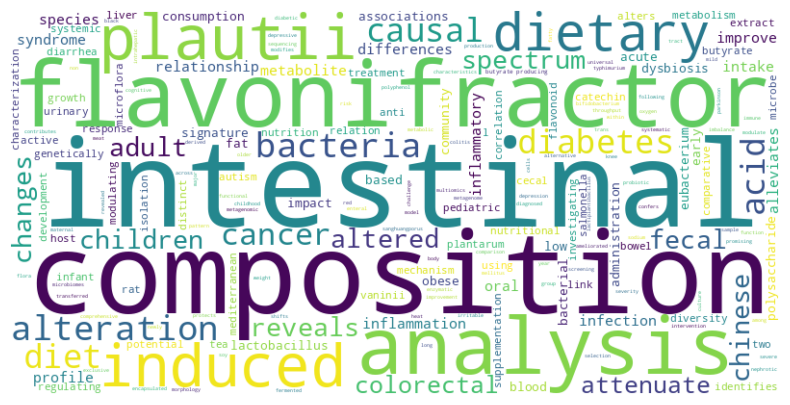

In [68]:

# Generate the word cloud, filtering out stop words
wordcloud = WordCloud(width=800, height=400, stopwords=stop_words, background_color='white').generate(preprocessed_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('./results/flavoni_wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/obrovkina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [150]:
# Function to extract bigrams from text
def get_bigrams(text):
    # Tokenize the text into words
    tokens = text.split()
    # Generate bigrams
    bigram_list = list(bigrams(tokens))
    # Filter out bigrams containing punctuation
    bigram_list = [bigram for bigram in bigram_list if all(word not in string.punctuation for word in bigram)]
    return bigram_list

# Apply the function to the 'Preprocessed_Title' column to get bigrams for each title
df['Bigrams'] = df['Preprocessed_Title'].apply(get_bigrams)


In [151]:
# Flatten the list of bigrams
all_bigrams = [bigram for sublist in df['Bigrams'] for bigram in sublist]
# Count the frequency of each bigram
bigram_freq = {}
for bigram in all_bigrams:
    if bigram in bigram_freq:
        bigram_freq[bigram] += 1
    else:
        bigram_freq[bigram] = 1

# Sort the bigrams by frequency
sorted_bigrams = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)

# Extract the top 20 bigrams
top_bigrams = sorted_bigrams[:20]

# Extract the bigram labels and frequencies for plotting
labels = [' '.join(bigram[0]) for bigram in top_bigrams]
frequencies = [bigram[1] for bigram in top_bigrams]

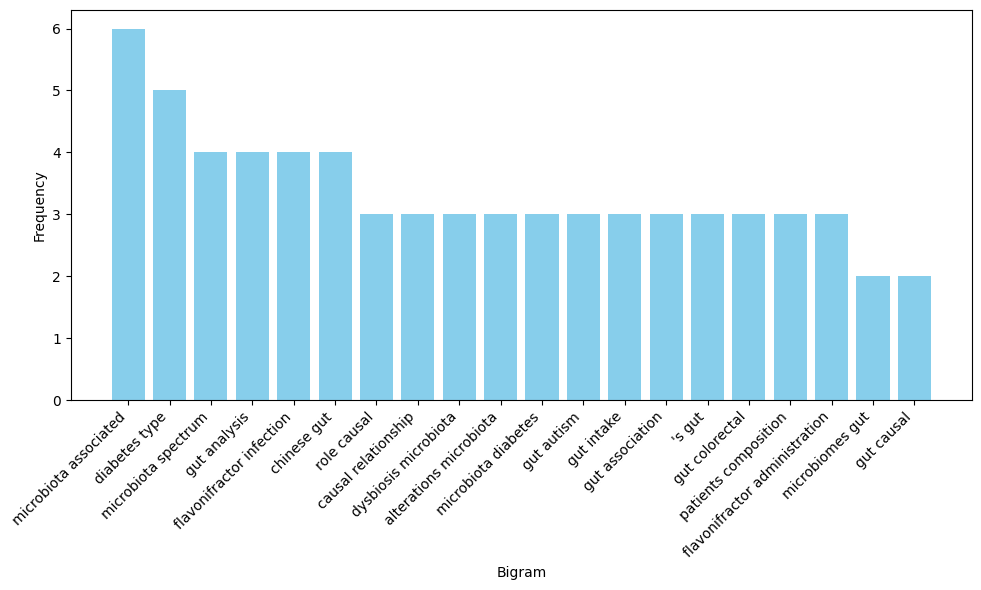

In [154]:
# Plot histogram of bigram frequencies
plt.figure(figsize=(10, 6))
plt.bar(labels, frequencies, color='skyblue')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('./results/flavoni_bigram.png', dpi=300, bbox_inches='tight')
plt.show()

# Analysis of abstracts

In [3]:
# download our differentialy abundant bacteria
res_prim_stool = pd.read_csv( "./results/2020-023_res_prim_stool.csv", index_col=0)
res_prim_filt = res_prim_stool[(res_prim_stool['passed_ss_GroupPSC'] == True) & (res_prim_stool['q_GroupPSC'] < 0.1)]

In [4]:
df = pd.read_csv('./results/literature.csv')

In [5]:
res_prim_filt['taxon'] = res_prim_filt['taxon'].str.split('__').str[1]

/var/folders/jb/_8_vphsd23b492s44llp9vx00000gp/T/ipykernel_43987/1734791800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_prim_filt['taxon'] = res_prim_filt['taxon'].str.split('__').str[1]


In [11]:
res_prim_filt

,taxon,lfc_(Intercept),lfc_GroupPSC,se_(Intercept),se_GroupPSC,W_(Intercept),W_GroupPSC,p_(Intercept),p_GroupPSC,q_(Intercept),q_GroupPSC,diff_(Intercept),diff_GroupPSC,passed_ss_(Intercept),passed_ss_GroupPSC
7,porphyromonadaceae,1.191320,-1.296659,0.189055,0.189074,6.301451,-6.857935,6.870027e-09,4.827014e-10,4.122016e-07,2.896208e-08,True,True,True,True
8,ruminococcaceae,0.637888,-0.736090,0.196751,0.200738,3.242118,-3.666920,1.258983e-03,2.695508e-04,6.169019e-02,1.401664e-02,False,True,False,True
11,alistipes,0.584376,-0.676990,0.186639,0.192861,3.131042,-3.510249,1.842184e-03,4.875133e-04,8.842484e-02,2.388815e-02,False,True,False,True
33,escherichia.shigella,-1.040178,1.061698,0.291163,0.300807,-3.572488,3.529501,3.904064e-04,4.576858e-04,2.069154e-02,2.288429e-02,True,True,True,True
35,flavonifractor,-0.697421,0.679829,0.180055,0.181881,-3.873369,3.737773,1.226306e-04,2.086202e-04,6.989946e-03,1.126549e-02,True,True,True,True
41,oxalobacter,0.608037,-0.691819,0.163989,0.158922,3.707787,-4.353205,2.857055e-04,2.353943e-05,1.542810e-02,1.341748e-03,True,True,True,True
45,phascolarctobacterium,0.727243,-0.807648,0.215022,0.217239,3.382184,-3.717787,8.714160e-04,2.636330e-04,4.531363e-02,1.397255e-02,True,True,True,True
46,prevotella,0.986366,-1.062308,0.293092,0.302189,3.365376,-3.515381,8.915556e-04,5.259841e-04,4.546934e-02,2.524724e-02,True,True,True,True
56,sutterella,0.755210,-0.850096,0.231025,0.234753,3.268952,-3.621242,1.208990e-03,3.457723e-04,6.044948e-02,1.763439e-02,False,True,False,True
60,clostridiales,1.107677,-1.269890,0.299315,0.307385,3.700713,-4.131265,2.412024e-04,4.291052e-05,1.326613e-02,2.402989e-03,True,True,True,True


In [10]:
df

,Unnamed: 0,PMID,Title,Abstract,Authors,Journal,Publication Date
0,0,38634357,Multiomics Analysis Revealed Colorectal Cancer...,gut microbiota-derived microbial compounds may...,"Xu, Yong-Jiang",Journal of proteome research,2024 Apr 18
1,1,38575885,Investigating the causal role of the gut micro...,background: through research on the gut microb...,"Li, Jia",BMC cancer,2024 Apr 4
2,2,38563684,Promising probiotic-fermented soymilk for alle...,fermented soymilk (fsm4) has attracted much at...,"Madjirebaye, Philippe",Food & function,2024 Apr 2
3,3,38555382,Enzymatic conversion of human blood group A ki...,abo blood group compatibility restrictions pre...,"MacMillan, Serena",Nature communications,2024 Mar 30
4,4,38529273,Potential for the development of Taraxacum mon...,introduction: taraxacum mongolicum (tm) is a k...,"Dong, Zhen",Frontiers in immunology,NaN
...,...,...,...,...,...,...,...
219,219,25427406,Successional changes in the chicken cecal micr...,background: poultry remains a major source of ...,"Oakley, Brian B",BMC veterinary research,2014 Nov 27
220,220,24947740,Isolation and characterization of rat intestin...,two intestinal bacterial strains mt4s-5 and mt...,"Takagaki, Akiko",Archives of microbiology,NaN
221,221,23918795,"Intestinimonas butyriciproducens gen. nov., sp...","a gram-positive, spore-forming, non-motile, st...","Klaring, Karoline",International journal of systematic and evolut...,NaN
222,222,21457417,Isolation of catechin-converting human intesti...,aims: to isolate and characterize bacteria fro...,"Kutschera, M",Journal of applied microbiology,NaN


In [12]:
# Convert 'Abstract' column to lowercase
df['Abstract'] = df['Abstract'].str.lower()

# Convert 'taxon' column to lowercase
res_prim_filt['taxon'] = res_prim_filt['taxon'].str.lower()


/var/folders/jb/_8_vphsd23b492s44llp9vx00000gp/T/ipykernel_43987/2458183245.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_prim_filt['taxon'] = res_prim_filt['taxon'].str.lower()


TypeError: unhashable type: 'Series'

In [43]:
taxon_articles = pd.DataFrame()
for taxon in res_prim_filt['taxon'][res_prim_filt['taxon'] != 'flavonifractor']:
    filtered_articles = pd.concat([filtered_articles, df[df['Abstract'].str.contains(taxon)]])



In [45]:
taxon_articles

""


In [69]:
# Apply preprocessing to the 'Title' column
df['Preprocessed_Abstract'] = df['Abstract'].apply(preprocess_text)

In [70]:
# Combine all preprocessed titles into a single string
preprocessed_abstract = ' '.join(df['Preprocessed_Abstract'])

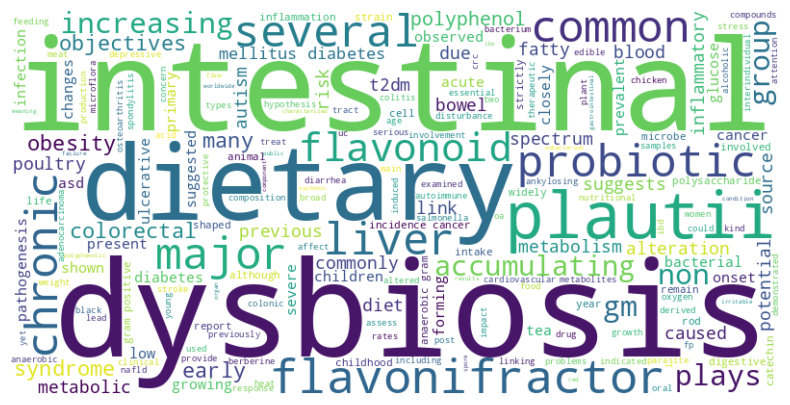

In [71]:
# Generate the word cloud, filtering out stop words
wordcloud = WordCloud(width=800, height=400, stopwords=stop_words, background_color='white').generate(preprocessed_abstract)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('./results/flavoni_wordcloud_abstract.png', dpi=300, bbox_inches='tight')
plt.show()

In [75]:
# Tokenize the string to extract individual words
words = preprocessed_abstract.split()

# Count the frequency of each word
word_counts = Counter(words)

# Create a DataFrame to store the word frequencies
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

In [77]:
word_freq_df = word_freq_df[~word_freq_df['Word'].isin(stop_words)]

In [79]:
# Remove punctuation symbols
word_freq_df = word_freq_df[~word_freq_df['Word'].str.contains('[{}]'.format(string.punctuation))]

In [80]:
word_freq_df

,Word,Frequency
66,dysbiosis,12
41,intestinal,11
585,flavonifractor,7
50,dietary,7
180,diabetes,7
...,...,...
380,sleep,1
381,disturbance,1
382,feng,1
384,gastrodia,1


In [81]:
word_freq_df.to_csv('./results/freq_words_abstract.csv')

## diseases

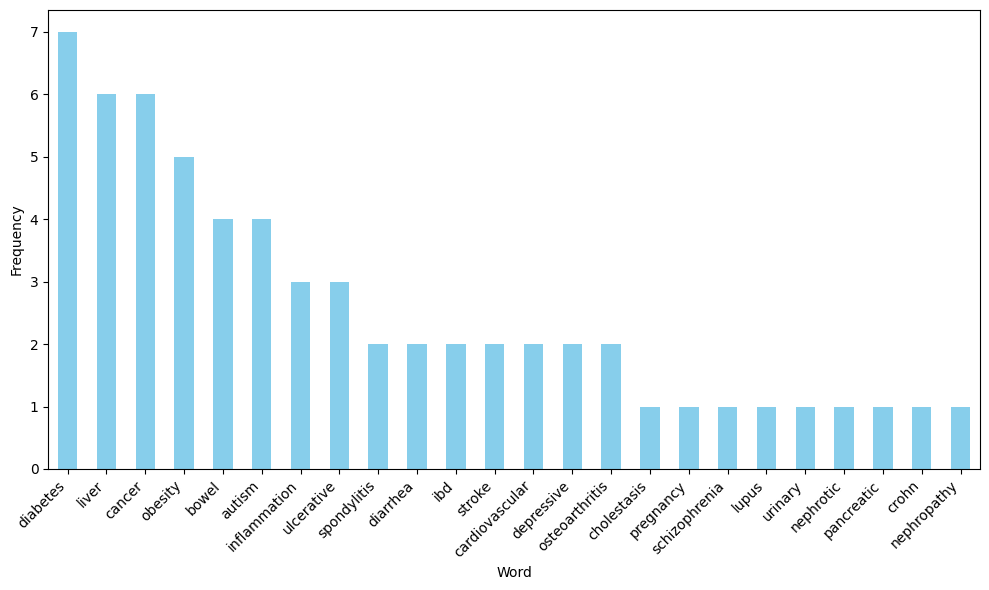

In [83]:
# List of specified words
specified_words = ['diabetes', 'cancer', 'liver', 'obesity', 'autism', 'bowel', 'ulcerative', 'inflammation', 'ibd', 'spondylitis', 'osteoarthritis', 'stroke', 'cardiovascular', 'depressive', 'diarrhea', 'cholestasis', 'pregnancy', 'urinary', 'schizophrenia', 'lupus', 'nephropathy', 'crohn', 'pancreatic', 'nephrotic']

# Filter rows containing specified words
filtered_df = df[df['Preprocessed_Abstract'].str.contains('|'.join(specified_words))]

# Count the frequency of each word
word_freq = filtered_df['Preprocessed_Abstract'].str.split(expand=True).stack().value_counts()

# Filter word frequencies for specified words
word_freq_specified = word_freq[word_freq.index.isin(specified_words)]

# Plot histogram
plt.figure(figsize=(10, 6))
word_freq_specified.plot(kind='bar', color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('./results/disease_freq.png', dpi=300, bbox_inches='tight')
plt.show()

## other taxa

In [85]:
# List of additional specified words
taxa = ['salmonella', 'eubacterium', 'bacillus', 'fragilis', 'platensis', 'enteritidis', 'lactiplantibacillus', 'clostridioides', 'aspergillus', 'plantarum', 'coli', 'lactobacillus', 'clostridium', 'eimeria']

# Filter rows containing additional specified words
additional_filtered_df = df[df['Preprocessed_Abstract'].str.contains('|'.join(taxa))]

# Count the frequency of each word
additional_word_freq = additional_filtered_df['Preprocessed_Abstract'].str.split(expand=True).stack().value_counts()

# Filter word frequencies for additional specified words
additional_word_freq_specified = additional_word_freq[additional_word_freq.index.isin(taxa)]


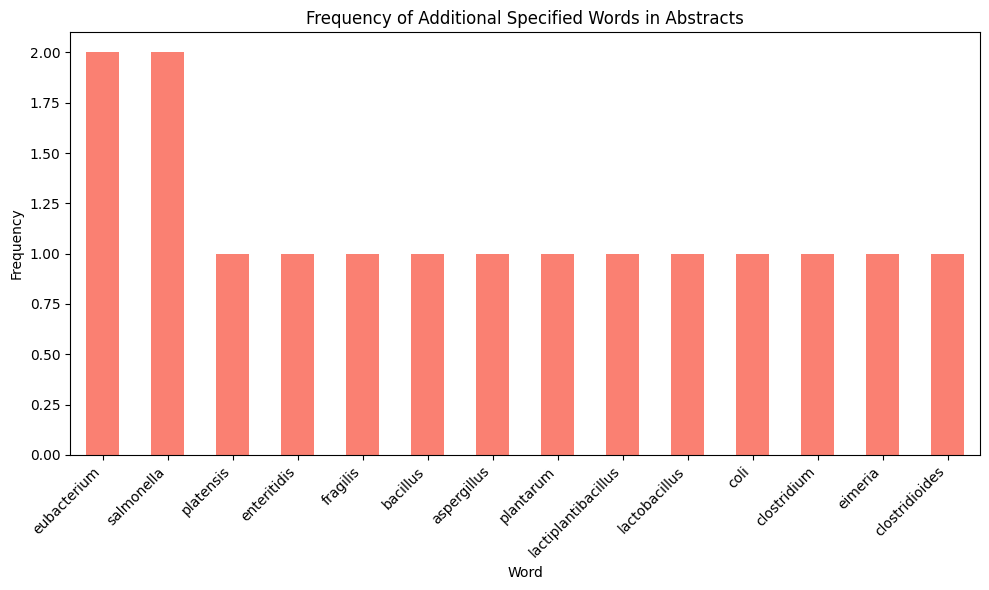

In [87]:
# Plot histogram
plt.figure(figsize=(10, 6))
additional_word_freq_specified.plot(kind='bar', color='salmon')
plt.title('Frequency of Additional Specified Words in Abstracts')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('./results/taxa_freq.png', dpi=300, bbox_inches='tight')
plt.show()

In [92]:
# List of additional specified words
additional_words = ['oxygen', 'iga', 'gp2', 'fimh+', 'adhesion', 'anaerobic', 'oxidase']

# Filter rows containing additional specified words
additional_filtered_df = df[df['Preprocessed_Abstract'].str.contains('|'.join(additional_words))]

# Count the frequency of each word
additional_word_freq = additional_filtered_df['Preprocessed_Abstract'].str.split(expand=True).stack().value_counts()

# Filter word frequencies for additional specified words
additional_word_freq_specified = additional_word_freq[additional_word_freq.index.isin(additional_words)]


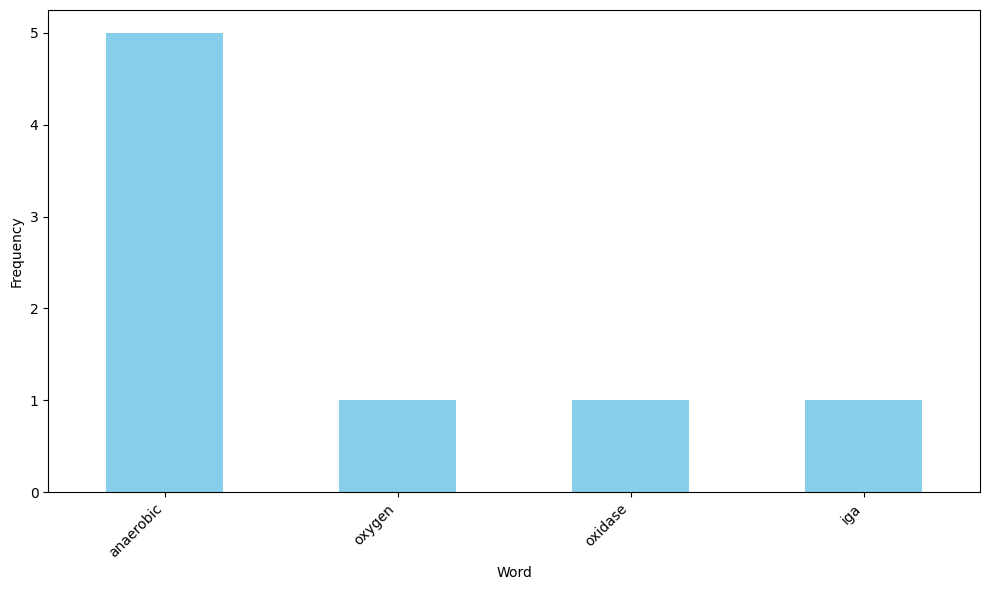

In [93]:
# Plot histogram
plt.figure(figsize=(10, 6))
additional_word_freq_specified.plot(kind='bar', color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [90]:
# Filter rows containing additional specified words
articles_with_additional_words = df[df['Preprocessed_Abstract'].str.contains('|'.join(additional_words))]

In [91]:
articles_with_additional_words

,Unnamed: 0,PMID,Title,Abstract,Authors,Journal,Publication Date,Preprocessed_Title,Preprocessed_Abstract
9,9,38412144,Elemental iron protects gut microbiota against...,gut dysbiosis induced by oxygen and reactive o...,"Ostrov, Ievgeniia",PloS one,NaN,iron dysbiosis microbiota elemental protects o...,induced dysbiosis oxygen reactive related gut ...
14,14,38222855,The preliminary evidence on the association of...,aims: this study aimed to investigate the asso...,"Huang, Haiyan",Frontiers in cellular and infection microbiology,NaN,association preliminary evidence microbiota gu...,: association aimed microbiota study aims gut ...
18,18,38065935,Gut microbiota composition in depressive disor...,studies investigating gut microbiota compositi...,"Gao, Mingxue",Translational psychiatry,2023 Dec 8,: disorder microbiota depressive composition g...,investigating disorder microbiota depressive s...
22,22,38003141,Effects of Essential Oil and/or Encapsulated B...,this study was conducted to investigate the ef...,"Luo, Zhihao",Animals : an open access journal from MDPI,2023 Nov 15,effects fecal oil encapsulated butyrate essent...,conducted oregano effects study investigate es...
23,23,37980753,Effect of Lactobacillus salivarius SNK-6 on eg...,the objective of this study was to investigate...,"Liu, Wei",Poultry science,NaN,quality egg lactobacillus intestinal snk-6 mor...,objective lactobacillus study investigate effect
63,63,36937262,Glucose oxidase as an alternative to antibioti...,this study aimed to demonstrate the effects of...,"Zhao, Wenyu",Frontiers in microbiology,NaN,alternative glucose antibiotic promoters growt...,effects glucose aimed ) study broilers ( demon...
89,89,36090029,Metagenomics-based systematic analysis reveals...,background: iga nephropathy (igan) is the most...,"Liang, Xiaolin",Frontiers in molecular biosciences,NaN,analysis metagenomics-based microbiota gut sys...,: type igan ) common ( nephropathy background ...
97,97,35834134,Production of indole and hydrogen sulfide by t...,"in this study, the oxygen-tolerant mutant stra...","Liu, Yu-Xia",Archives of microbiology,2022 Jul 14,indole oxygen-tolerant hydrogen mutant sulfide...,oxygen-tolerant mutant clostridium study sp . ...
111,111,35387091,Trans-Anethole Alleviates Subclinical Necro-Ha...,this study investigated the alleviative potent...,"Yu, Caiyun",Frontiers in microbiology,NaN,subclinical trans-anethole alleviates necro-ha...,ta trans-anethole ) study investigated ( allev...
128,128,34515131,Berberine Improves the Symptoms of DHEA-Induce...,objectives: the aim of this study was to inves...,"Shen, Hao-Ran",Gynecologic and obstetric investigation,NaN,rats regulating berberine improves gut symptom...,: aim effects study berberine investigate obje...


In [95]:
articles_with_additional_words_subset = articles_with_additional_words[['PMID', 'Title', 'Abstract', 'Authors', 'Journal']]

In [96]:
articles_with_additional_words_subset.to_csv('./results/subset_literature.csv')

# Cluster analysis

In [108]:
# Preprocessing
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    nltk.download('punkt')
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalnum() and token.lower() not in stop_words]
    return ' '.join(tokens)

df['Preprocessed_Title'] = df['Title'].apply(preprocess_text)

# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Preprocessed_Title'])



[nltk_data] Downloading package punkt to /Users/obrovkina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/obrovkina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/obrovkina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/obrovkina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/obrovkina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/obrovkina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/obrovkina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/obrovkina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading 

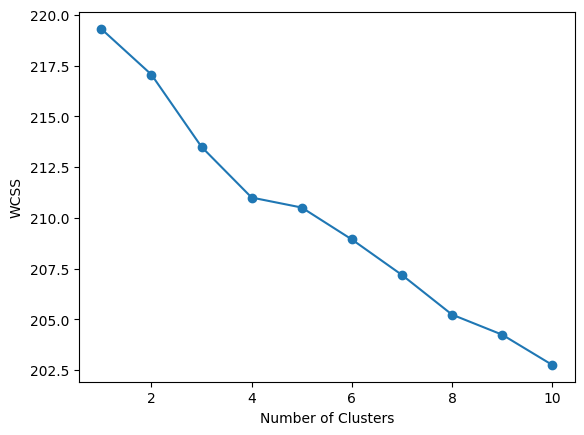

In [109]:
# Elbow Method to define optimal numbers of clusters 
wcss = []
max_clusters = 10  # You can adjust this based on your data
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



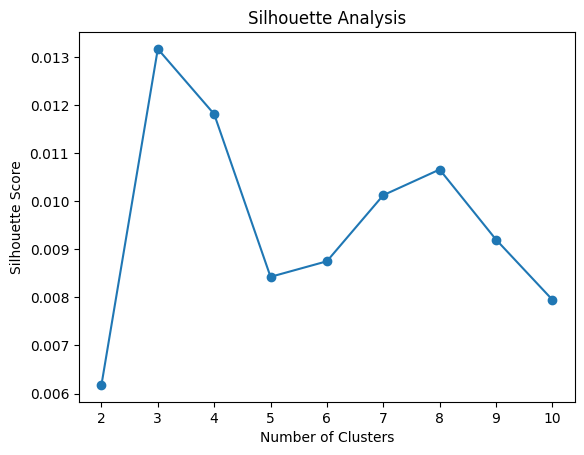

In [110]:
# Silhouette Analysis to define optimal numbers of clusters 
silhouette_scores = []
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()


In [111]:
# according to silhouette analysis, the optimal number of clusters is 3

In [121]:
seed_value = 42
np.random.seed(seed_value)
# Clustering
num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Add cluster labels to DataFrame
df['Cluster'] = kmeans.labels_

# Evaluation (optional)
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.013166121174535736


In [115]:
X

<224x773 sparse matrix of type '<class 'numpy.float64'>'
	with 1476 stored elements in Compressed Sparse Row format>

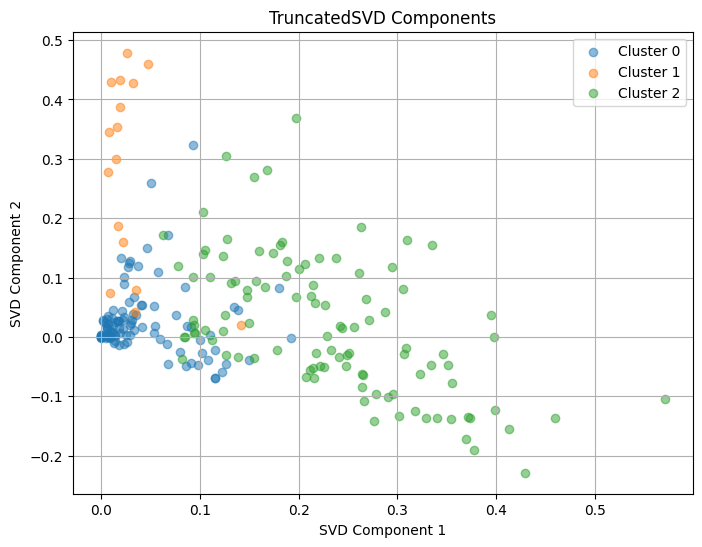

In [126]:
# Number of components for PCA
n_components = 2

# Instantiate TruncatedSVD
svd = TruncatedSVD(n_components=n_components)

# Fit and transform the data
X_svd = svd.fit_transform(X)
# Plot TruncatedSVD components
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    plt.scatter(X_svd[df['Cluster'] == cluster, 0], X_svd[df['Cluster'] == cluster, 1], label=f'Cluster {cluster}', alpha=0.5)
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [127]:
# Calculate the explained variance ratio
explained_variance_ratio = svd.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = explained_variance_ratio.cumsum()

In [128]:
cumulative_variance_ratio

array([0.01487039, 0.02886613])

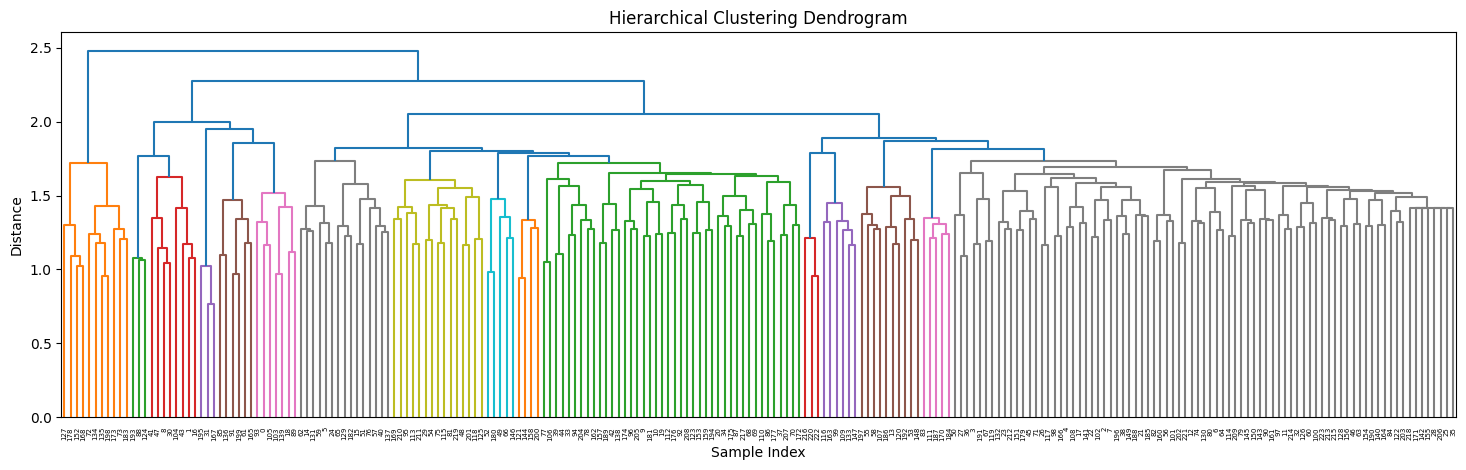

In [134]:
# Perform hierarchical clustering
# Convert X to dense array
X_dense = X.toarray()

Z = linkage(X_dense, method='ward')

# Plot dendrogram
plt.figure(figsize=(18, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [131]:
X

<224x773 sparse matrix of type '<class 'numpy.float64'>'
	with 1476 stored elements in Compressed Sparse Row format>